#### Analytical Questions
1. What are the different customer segments based on usage patterns such as tenure, PhoneService, MultipleLine, Internet Service, Online Security, OnlineBackup, DeviceProtection, TechSupport, Streaming TV, Streaming Movies, and Contract type?
2. What are the different customer segments based on demographic factors such as gender, SeniorCitizen status, Partner status, and Dependents?
3. What are the different customer segments based on payment information such as Paperless Billing, Payment Method, Monthly Charges, and TotalCharges?

#### **Null Hypothesis:** There seems to be no relation between total charges and churn
#### **Alternate Hypothesis:** There is a strong relationship between total charges and churn

### Importations

In [1]:
import pyodbc 
from dotenv import dotenv_values 
import re
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection"

In [4]:
connection = pyodbc.connect(connection_string)

In [5]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
 
# Read data from the SQL query result
data_1 = pd.read_sql(query, connection)

 # Display the first few rows of the DataFrame
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
data_1.describe(include='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
data_1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [9]:
data_1.dropna(subset=['TotalCharges'], inplace=True)

the 651 missing values make 21% of the missing data therefore it is risky to delete these rows as a lot of information will be lost hence, the missing values shall be replaced with unknown

In [10]:

# Replace missing values with "unknown"
data_1.fillna("unknown", inplace=True)

In [11]:
data_1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,2995.0,32.581636,24.622418,1.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,2995.0,65.377880,30.139525,18.400000,35.799999,70.900002,90.300003,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [13]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2995 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2995 non-null   object 
 1   gender            2995 non-null   object 
 2   SeniorCitizen     2995 non-null   bool   
 3   Partner           2995 non-null   bool   
 4   Dependents        2995 non-null   bool   
 5   tenure            2995 non-null   int64  
 6   PhoneService      2995 non-null   bool   
 7   MultipleLines     2995 non-null   object 
 8   InternetService   2995 non-null   object 
 9   OnlineSecurity    2995 non-null   object 
 10  OnlineBackup      2995 non-null   object 
 11  DeviceProtection  2995 non-null   object 
 12  TechSupport       2995 non-null   object 
 13  StreamingTV       2995 non-null   object 
 14  StreamingMovies   2995 non-null   object 
 15  Contract          2995 non-null   object 
 16  PaperlessBilling  2995 non-null   bool   
 17  

In [14]:
data_1.describe(include='object').T

,count,unique,top,freq
customerID,2995,2995,7590-VHVEG,1
gender,2995,2,Male,1535
MultipleLines,2995,3,False,1435
InternetService,2995,3,Fiber optic,1343
OnlineSecurity,2995,3,False,1478
OnlineBackup,2995,3,False,1319
DeviceProtection,2995,3,False,1296
TechSupport,2995,3,False,1475
StreamingTV,2995,3,False,1190
StreamingMovies,2995,3,True,1198


In [15]:
cols = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
data_1[cols] = data_1[cols].astype(bool)

In [16]:
data_1.describe(include='object').T

,count,unique,top,freq
customerID,2995,2995,7590-VHVEG,1
gender,2995,2,Male,1535
InternetService,2995,3,Fiber optic,1343
Contract,2995,3,Month-to-month,1641
PaymentMethod,2995,4,Electronic check,1004


In [17]:
data_1.duplicated().sum()

0

### Issues
1. Changing the wrong data types- data_2;TotalCharges to float from object, object to boolean
2. Synchronizing column information - MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling  to true or flase from yes or no
3. Dealong with missing information
4. 


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

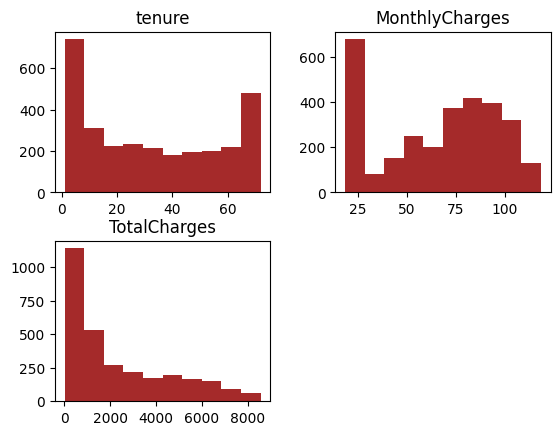

In [18]:
data_1.hist(grid=False, color='brown')

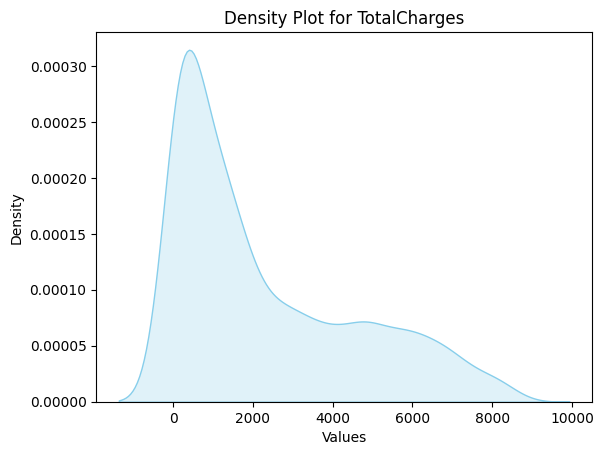

In [22]:
# Create a density plot using seaborn
sns.kdeplot(data=data_1['TotalCharges'], fill=True, color='skyblue')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot for TotalCharges')

# Show the plot
plt.show()

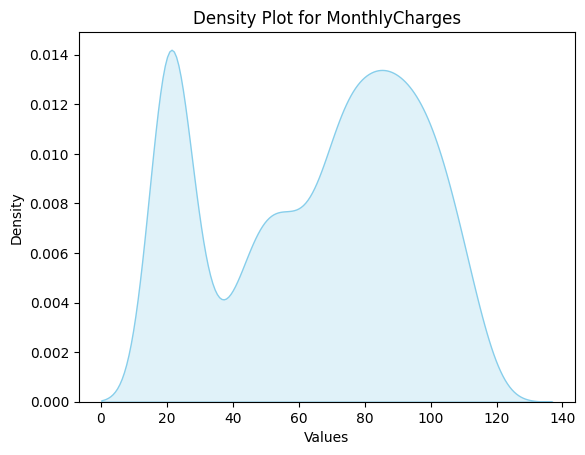

In [23]:
#Create a density plot using seaborn
sns.kdeplot(data=data_1['MonthlyCharges'], fill=True, color='skyblue')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot for MonthlyCharges')

# Show the plot
plt.show()

In [19]:
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,True,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,True,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Multivariate Analysis

In [20]:
corr= data_1.corr(numeric_only=True)
corr

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.006884,-0.197243,-0.015047,0.017146,0.098045,-0.196699,-0.089866,-0.078326,-0.192090,-0.035991,-0.048747,0.159031,0.222241,0.084392,0.141843
Partner,0.006884,1.000000,0.476698,0.385503,0.016360,0.123789,0.135628,0.123937,0.125266,0.096267,0.112356,0.111098,0.006675,0.091813,0.326662,-0.141802
Dependents,-0.197243,0.476698,1.000000,0.187814,-0.011508,-0.015628,0.191493,0.121365,0.118538,0.158358,0.120404,0.094472,-0.107672,-0.099502,0.096310,-0.171529
tenure,-0.015047,0.385503,0.187814,1.000000,0.011818,0.326783,0.278429,0.328884,0.321423,0.269138,0.245013,0.244638,0.004323,0.229410,0.824273,-0.349814
PhoneService,0.017146,0.016360,-0.011508,0.011818,1.000000,-0.300052,0.049775,0.078863,0.093329,0.050403,0.129093,0.095574,0.012493,0.241227,0.110220,0.012343
MultipleLines,0.098045,0.123789,-0.015628,0.326783,-0.300052,1.000000,-0.108494,-0.014776,-0.039060,-0.094543,0.010699,0.023310,0.151616,0.337354,0.404328,0.033798
OnlineSecurity,-0.196699,0.135628,0.191493,0.278429,0.049775,-0.108494,1.000000,0.378137,0.376663,0.470348,0.267148,0.276747,-0.248813,-0.360293,0.071105,-0.352260
OnlineBackup,-0.089866,0.123937,0.121365,0.328884,0.078863,-0.014776,0.378137,1.000000,0.358705,0.374544,0.305020,0.282785,-0.130437,-0.222819,0.184263,-0.278873
DeviceProtection,-0.078326,0.125266,0.118538,0.321423,0.093329,-0.039060,0.376663,0.358705,1.000000,0.422907,0.402217,0.411998,-0.160364,-0.166493,0.194272,-0.265608
TechSupport,-0.192090,0.096267,0.158358,0.269138,0.050403,-0.094543,0.470348,0.374544,0.422907,1.000000,0.345211,0.341522,-0.222693,-0.324050,0.079593,-0.374755


<Axes: >

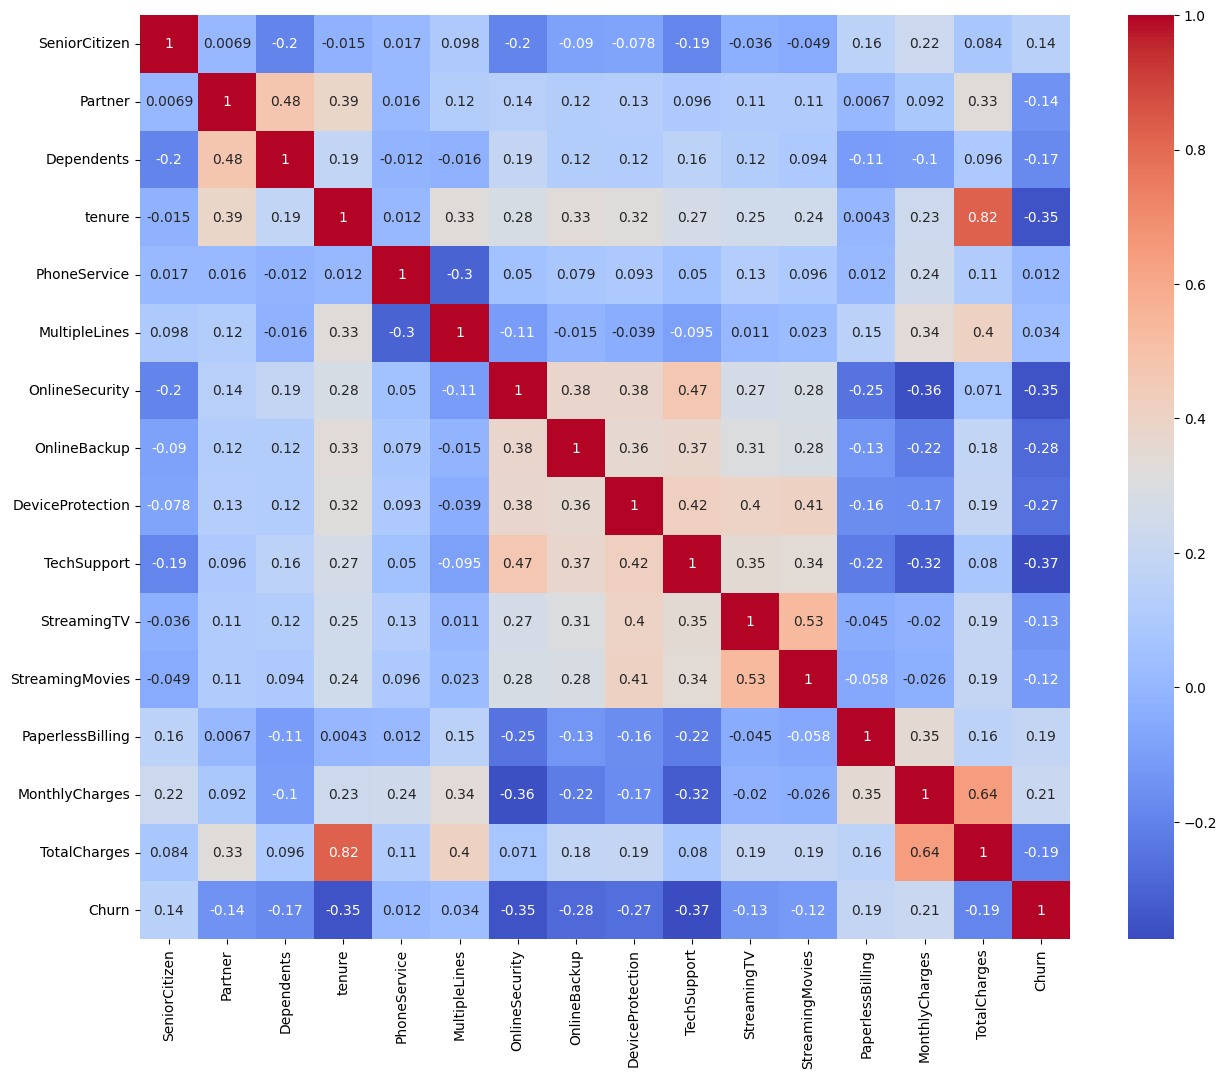

In [21]:
plt.figure(figsize= (15,12))
sns.heatmap(data=corr, annot=True,cmap='coolwarm')

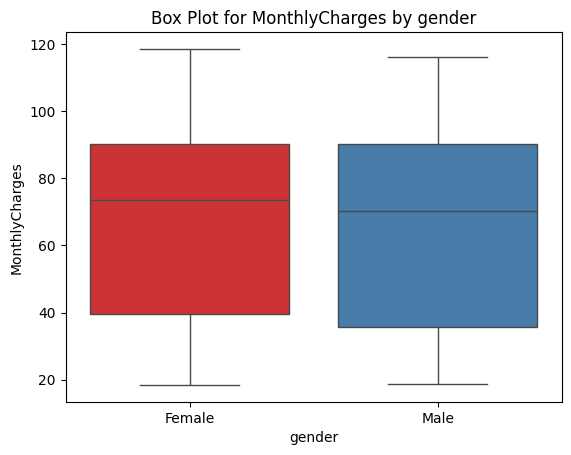

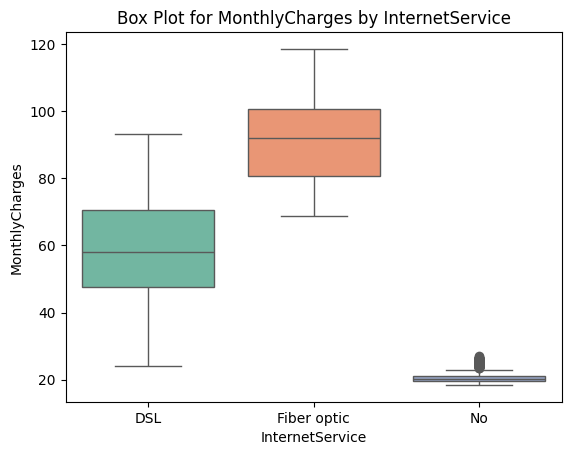

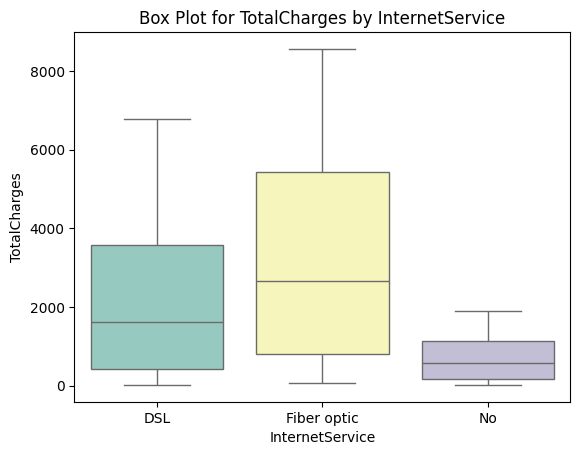

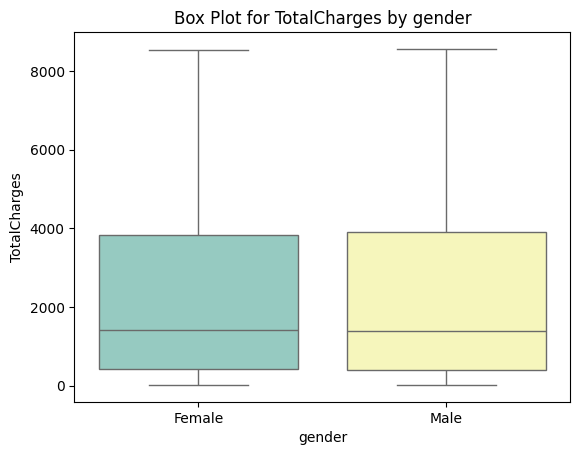

In [27]:
# Create box plots
sns.boxplot(x='gender', y='MonthlyCharges', data=data_1, palette='Set1')
plt.title('Box Plot for MonthlyCharges by gender')
plt.show()


sns.boxplot(x='InternetService', y='MonthlyCharges', data=data_1, palette='Set2')
plt.title('Box Plot for MonthlyCharges by InternetService')
plt.show()


sns.boxplot(x='InternetService', y='TotalCharges', data=data_1, palette='Set3')
plt.title('Box Plot for TotalCharges by InternetService')
plt.show()

sns.boxplot(x='gender', y='TotalCharges', data=data_1, palette='Set3')
plt.title('Box Plot for TotalCharges by gender')
plt.show()

The first box plot shows that there is a significant difference in the distribution of monthly charges by gender. Male customers are more likely to pay higher monthly charges than female customers. There are also more outliers in the male data set, suggesting that there is greater variability in monthly charges for male customers.

The second box plot shows median monthly charge is highest for fiber optic internet, followed by DSL internet, and then no internet service. This is likely because fiber optic internet offers the fastest speeds and the most reliable service.

The last box plot shows that  the range of total charges is similar for both genders.

In [29]:
data_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

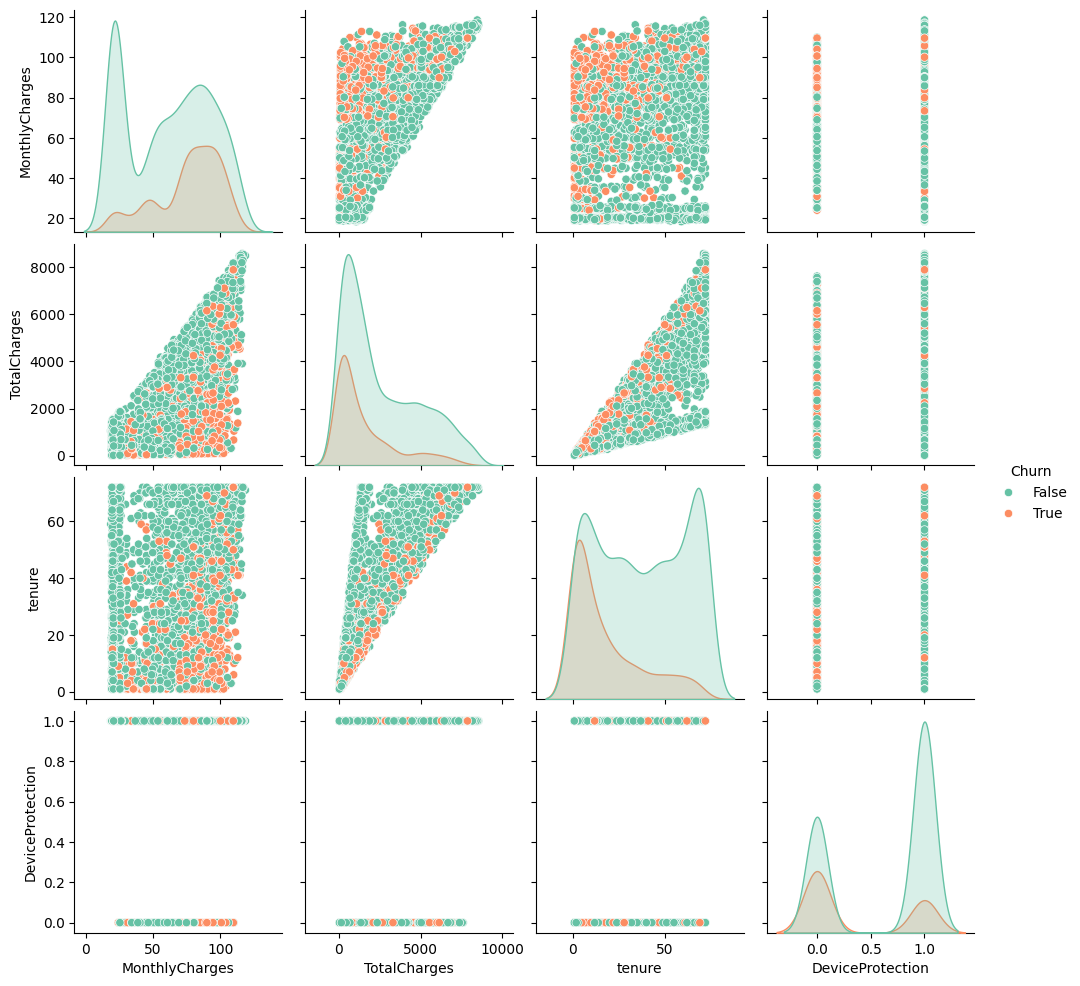

In [46]:
# Create pairplots for multiple scatterplots
dataa = data_1[['MonthlyCharges','TotalCharges','Churn','tenure','DeviceProtection']]
sns.pairplot(dataa, hue='Churn', palette='Set2')

plt.show()

### Analytical Questions

##### What are the different customer segments based on demographic factors such as gender, SeniorCitizen status, Partner status, and Dependents?

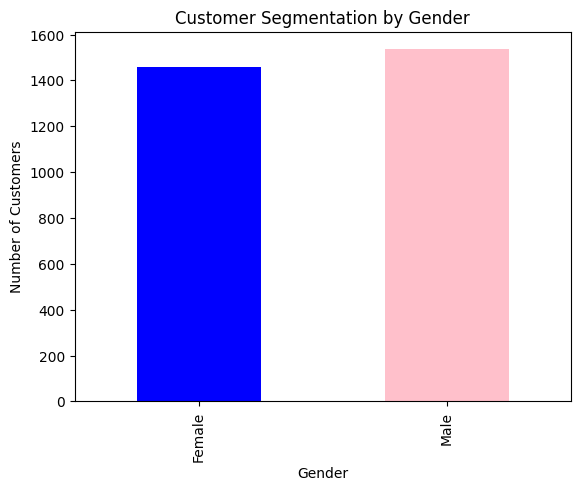

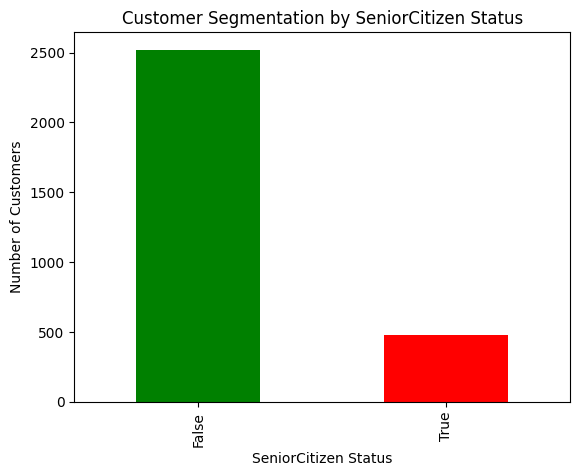

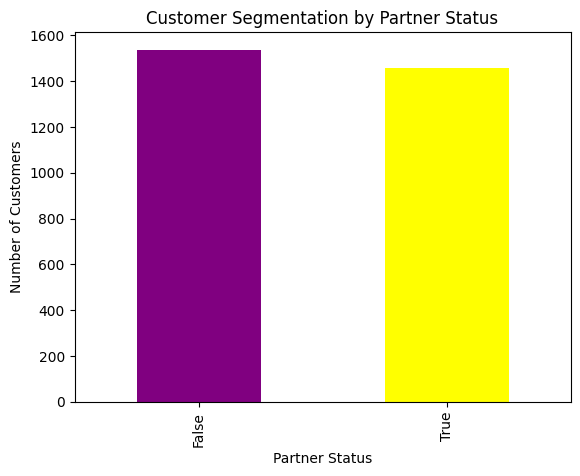

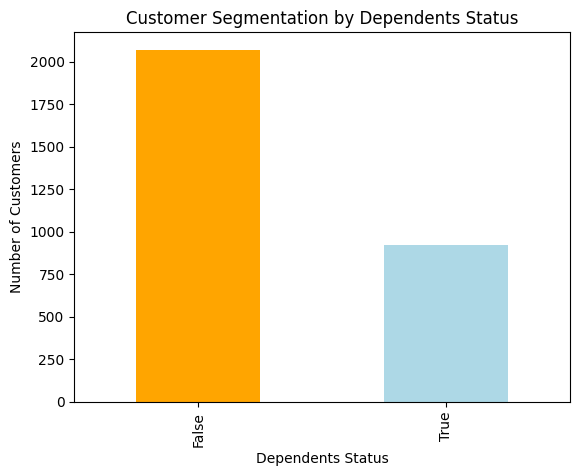

In [47]:
# Segment customers based on gender
gender_segments = data_1.groupby("gender")

# Plot the customer segments for each gender
gender_segment_counts = gender_segments.size()
gender_segment_counts.plot(kind="bar", color=["blue", "pink"])
plt.title("Customer Segmentation by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on SeniorCitizen status
senior_citizen_segments = data_1.groupby("SeniorCitizen")

# Plot the customer segments for each SeniorCitizen status
senior_citizen_segment_counts = senior_citizen_segments.size()
senior_citizen_segment_counts.plot(kind="bar", color=["green", "red"])
plt.title("Customer Segmentation by SeniorCitizen Status")
plt.xlabel("SeniorCitizen Status")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on Partner status
partner_segments = data_1.groupby("Partner")

# Plot the customer segments for each Partner status
partner_segment_counts = partner_segments.size()
partner_segment_counts.plot(kind="bar", color=["purple", "yellow"])
plt.title("Customer Segmentation by Partner Status")
plt.xlabel("Partner Status")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on Dependents status
dependents_segments = data_1.groupby("Dependents")

# Plot the customer segments for each Dependents status
dependents_segment_counts = dependents_segments.size()
dependents_segment_counts.plot(kind="bar", color=["orange", "lightblue"])
plt.title("Customer Segmentation by Dependents Status")
plt.xlabel("Dependents Status")
plt.ylabel("Number of Customers")
plt.show()

In [49]:
data_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### What are the different customer segments based on usage patterns such as tenure, PhoneService, MultipleLines, Internet Service, Online Security, OnlineBackup, DeviceProtection, TechSupport, Streaming TV, Streaming Movies, and Contract type?

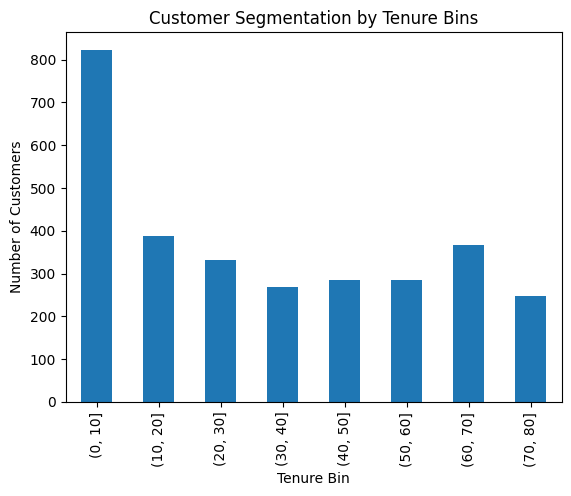

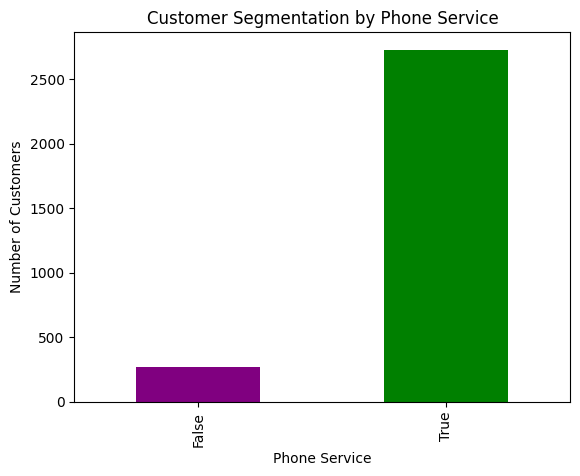

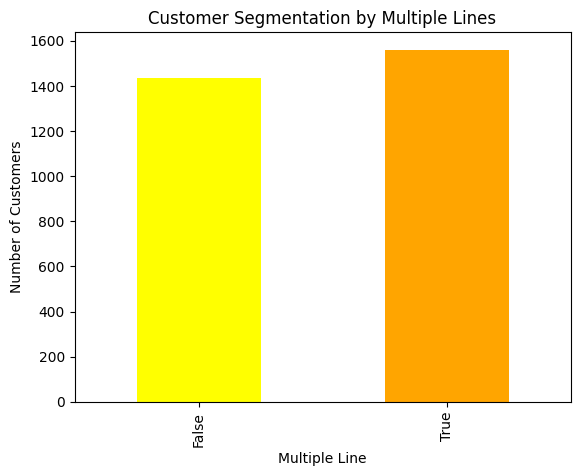

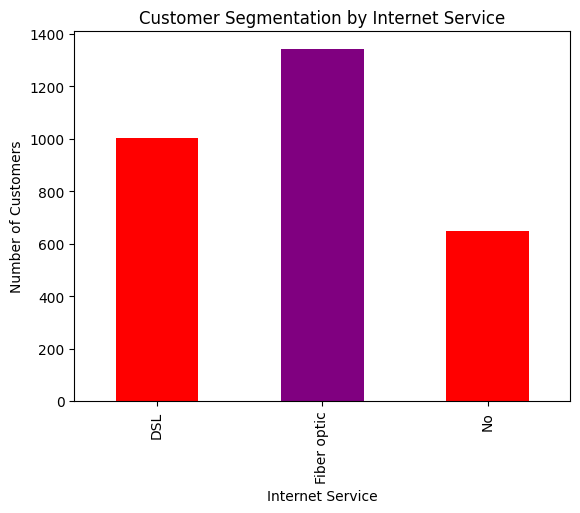

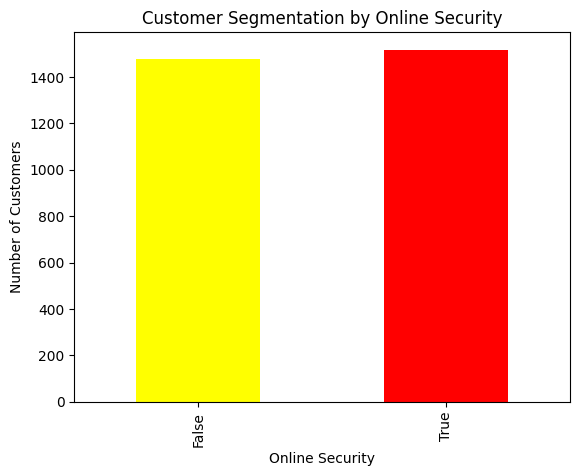

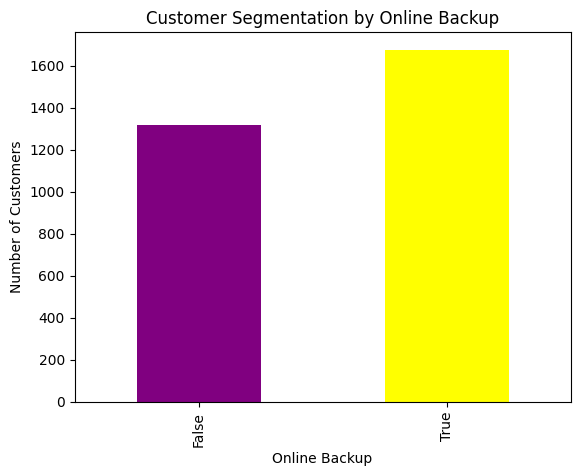

Text(0.5, 1.0, 'Customer Segmentation by Device Protection')

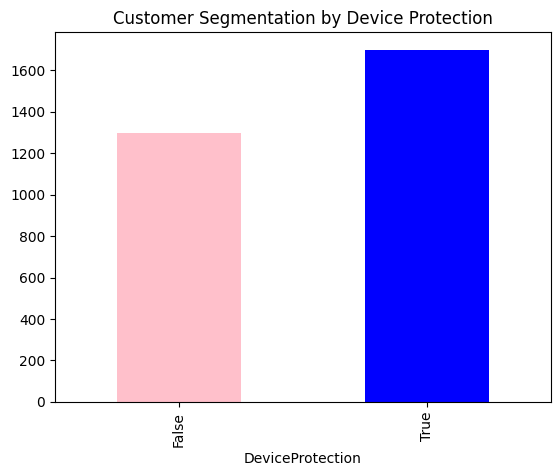

In [58]:
# Segment customers based on tenure
# Create bins for tenure
tenure_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Segment customers based on tenure bins
tenure_bin_segments = data_1.groupby(pd.cut(data_1["tenure"], tenure_bins))

# Plot the customer segments for each tenure bin
tenure_bin_segment_counts = tenure_bin_segments.size()
tenure_bin_segment_counts.plot(kind="bar")
plt.title("Customer Segmentation by Tenure Bins")
plt.xlabel("Tenure Bin")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on PhoneService
phone_service_segments = data_1.groupby("PhoneService")

# Plot the customer segments for each PhoneService
phone_service_segment_counts = phone_service_segments.size()
phone_service_segment_counts.plot(kind="bar", color=["purple", "green"])
plt.title("Customer Segmentation by Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on MultipleLine
multiple_line_segments = data_1.groupby("MultipleLines")

# Plot the customer segments for each MultipleLine
multiple_line_segment_counts = multiple_line_segments.size()
multiple_line_segment_counts.plot(kind="bar", color=["yellow", "orange"])
plt.title("Customer Segmentation by Multiple Lines")
plt.xlabel("Multiple Line")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on Internet Service
internet_service_segments = data_1.groupby("InternetService")

# Plot the customer segments for each Internet Service
internet_service_segment_counts = internet_service_segments.size()
internet_service_segment_counts.plot(kind="bar", color=["red", "purple"])
plt.title("Customer Segmentation by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on Online Security
online_security_segments = data_1.groupby("OnlineSecurity")

# Plot the customer segments for each Online Security
online_security_segment_counts = online_security_segments.size()
online_security_segment_counts.plot(kind="bar", color=["yellow", "red"])
plt.title("Customer Segmentation by Online Security")
plt.xlabel("Online Security")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on OnlineBackup
online_backup_segments = data_1.groupby("OnlineBackup")

# Plot the customer segments for each OnlineBackup
online_backup_segment_counts = online_backup_segments.size()
online_backup_segment_counts.plot(kind="bar", color=["purple", "yellow"])
plt.title("Customer Segmentation by Online Backup")
plt.xlabel("Online Backup")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers based on DeviceProtection
device_protection_segments = data_1.groupby("DeviceProtection")

# Plot the customer segments for each DeviceProtection
device_protection_segment_counts = device_protection_segments.size()
device_protection_segment_counts.plot(kind="bar", color=["pink", "blue"])
plt.title("Customer Segmentation by Device Protection")